In [1]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
# Load local CSV file
df = pd.read_csv('IrisDataset/IrisDataset/iris.csv')

# Clean species names for better visualization
df['Species_Clean'] = df['Species'].str.replace('Iris-', '')

# Display basic information
print("=" * 60)
print("IRIS DATASET OVERVIEW")
print("=" * 60)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFeatures: {', '.join(df.columns[1:5])}")
print(f"\nTarget Classes: {', '.join(df['Species_Clean'].unique())}")
print(f"\nClass Distribution:\n{df['Species_Clean'].value_counts()}")
print("=" * 60)

IRIS DATASET OVERVIEW
Dataset Shape: 150 rows × 7 columns

Features: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

Target Classes: setosa, versicolor, virginica

Class Distribution:
Species_Clean
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


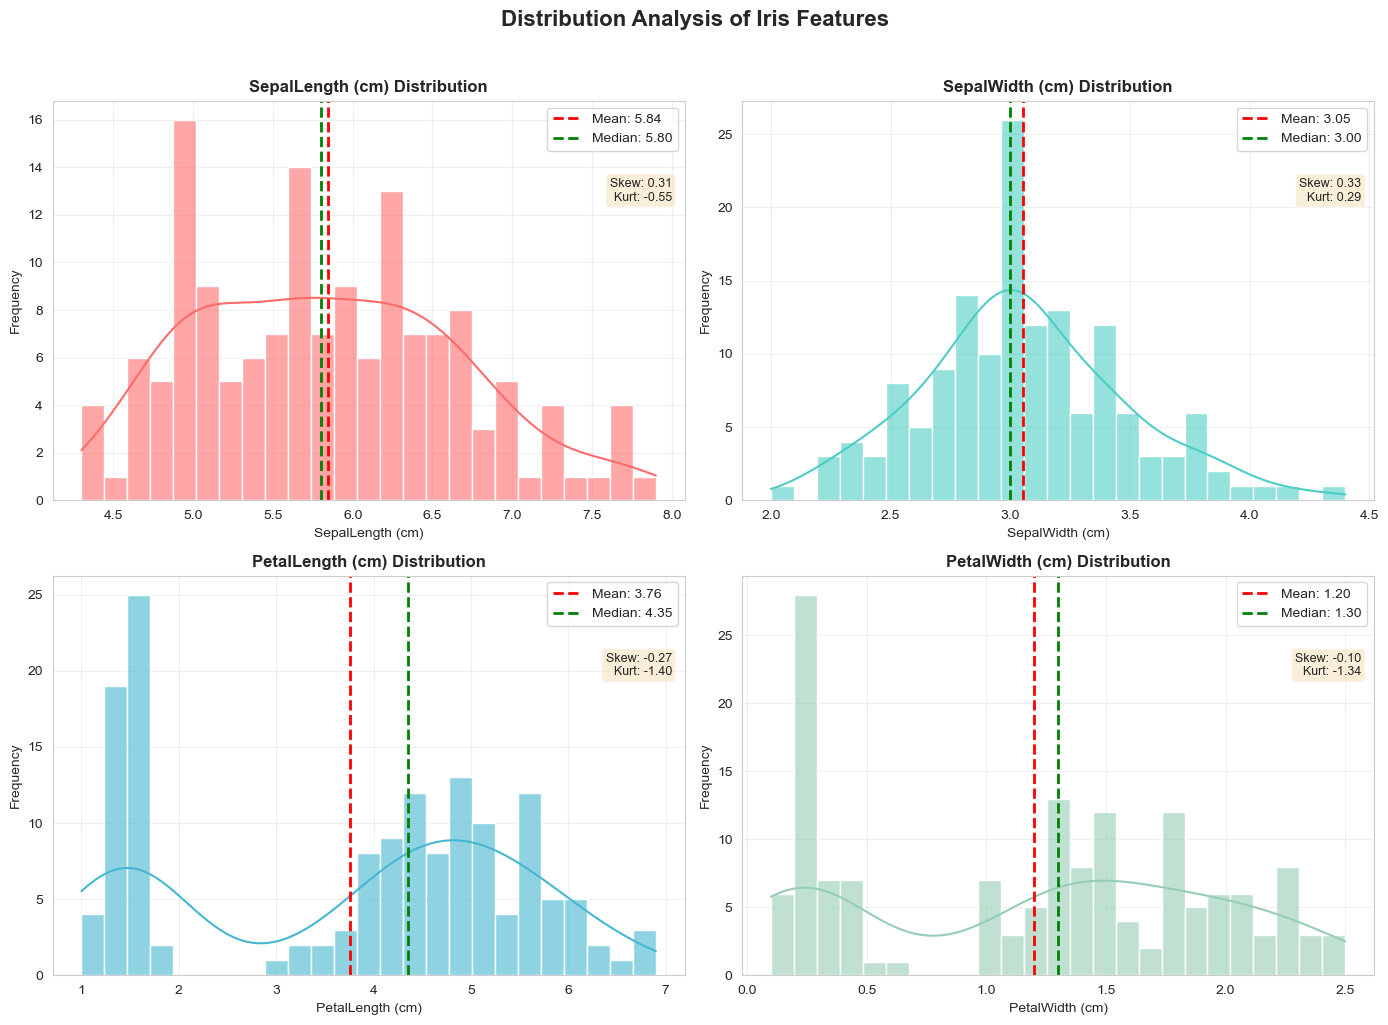


DISTRIBUTION INSIGHTS
SepalLengthCm: Fairly symmetric (skew=0.31)
SepalWidthCm: Fairly symmetric (skew=0.33)
PetalLengthCm: Fairly symmetric (skew=-0.27)
PetalWidthCm: Fairly symmetric (skew=-0.10)


In [3]:
"""
PURPOSE: Understand the distribution of each feature and identify patterns,
outliers, and the shape of data distribution for each measurement.
"""

# Create figure with subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution Analysis of Iris Features', fontsize=16, fontweight='bold', y=1.02)

# Define features and colors
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for idx, (ax, feature, color) in enumerate(zip(axes.flat, features, colors)):
    # Plot histogram with KDE for overall distribution
    sns.histplot(data=df, x=feature, kde=True, ax=ax, color=color, alpha=0.6, bins=25)
    
    # Add vertical lines for mean and median
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Styling
    ax.set_title(f'{feature.replace("Cm", " (cm)")} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature.replace('Cm', ' (cm)'))
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    
    # Add statistical annotation
    skew = df[feature].skew()
    kurt = df[feature].kurtosis()
    ax.text(0.98, 0.75, f'Skew: {skew:.2f}\nKurt: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=9,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            horizontalalignment='right')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "=" * 60)
print("DISTRIBUTION INSIGHTS")
print("=" * 60)
for feature in features:
    skew = df[feature].skew()
    print(f"{feature}: {'Right-skewed' if skew > 0.5 else 'Left-skewed' if skew < -0.5 else 'Fairly symmetric'} (skew={skew:.2f})")

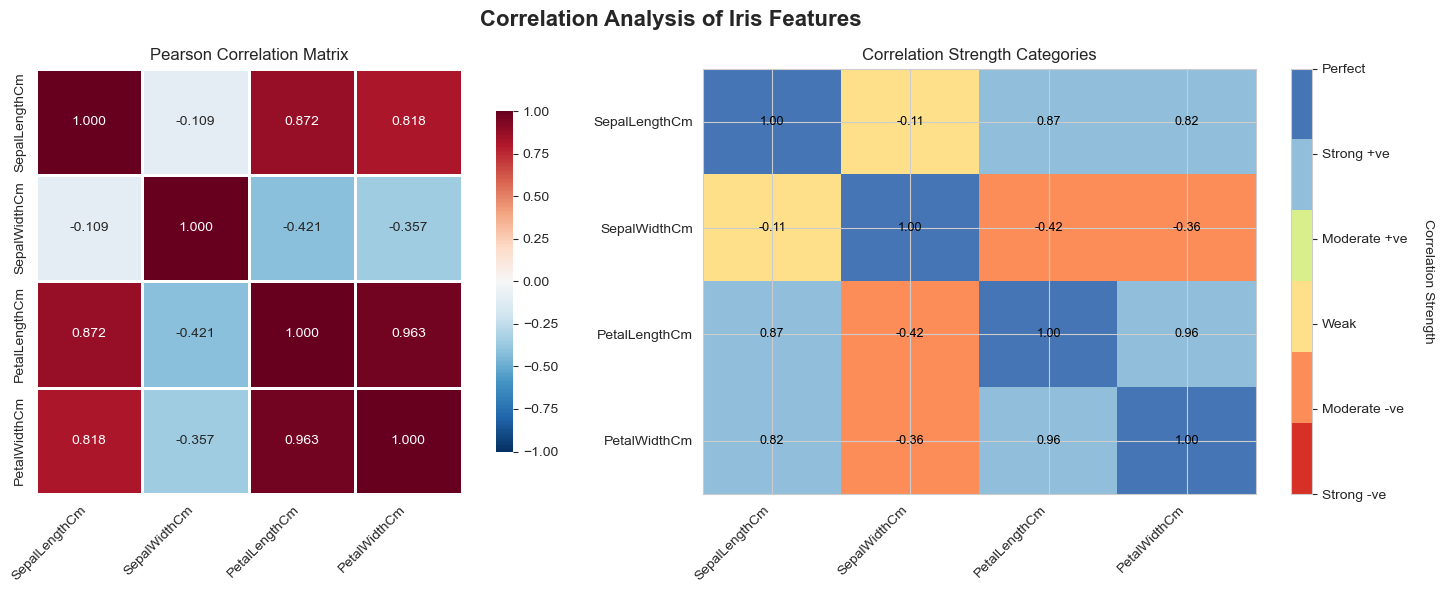


CORRELATION INSIGHTS
Strong Correlations (|r| > 0.7):
  • SepalLengthCm ↔ PetalLengthCm: 0.872
  • SepalLengthCm ↔ PetalWidthCm: 0.818
  • PetalLengthCm ↔ PetalWidthCm: 0.963


In [4]:
"""
PURPOSE: Identify relationships between features to understand multicollinearity
and feature importance for classification tasks.
"""

# Create correlation matrix
numeric_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
corr_matrix = df[numeric_features].corr()

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Correlation Analysis of Iris Features', fontsize=16, fontweight='bold')

# Heatmap 1: Standard correlation heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Pearson Correlation Matrix', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Heatmap 2: Correlation strength categories
# Create categorical correlation matrix
corr_strength = corr_matrix.copy()
conditions = [
    (corr_strength >= 0.7) & (corr_strength < 1),
    (corr_strength >= 0.3) & (corr_strength < 0.7),
    (corr_strength >= -0.3) & (corr_strength < 0.3),
    (corr_strength >= -0.7) & (corr_strength < -0.3),
    (corr_strength < -0.7)
]
choices = [4, 3, 2, 1, 0]  # Strong positive, moderate positive, weak, moderate negative, strong negative

for i in range(len(corr_strength)):
    for j in range(len(corr_strength)):
        if i == j:
            corr_strength.iloc[i, j] = 5  # Perfect correlation (diagonal)
        else:
            for k, condition in enumerate(conditions):
                if condition.iloc[i, j]:
                    corr_strength.iloc[i, j] = choices[k]
                    break

# Create custom colormap
colors_corr = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91bfdb', '#4575b4']
cmap_custom = plt.cm.colors.ListedColormap(colors_corr)

# Plot categorical heatmap
im = ax2.imshow(corr_strength, cmap=cmap_custom, aspect='auto', vmin=0, vmax=5)
ax2.set_xticks(np.arange(len(numeric_features)))
ax2.set_yticks(np.arange(len(numeric_features)))
ax2.set_xticklabels(numeric_features, rotation=45, ha='right')
ax2.set_yticklabels(numeric_features)
ax2.set_title('Correlation Strength Categories', fontsize=12)

# Add text annotations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax2.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

# Add colorbar with labels
cbar = plt.colorbar(im, ax=ax2, ticks=[0, 1, 2, 3, 4, 5])
cbar.set_label('Correlation Strength', rotation=270, labelpad=20)
cbar.ax.set_yticklabels(['Strong -ve', 'Moderate -ve', 'Weak', 'Moderate +ve', 'Strong +ve', 'Perfect'])

plt.tight_layout()
plt.show()

# Print correlation insights
print("\n" + "=" * 60)
print("CORRELATION INSIGHTS")
print("=" * 60)
strong_corr = []
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            strong_corr.append(f"{corr_matrix.index[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

print("Strong Correlations (|r| > 0.7):")
for corr in strong_corr:
    print(f"  • {corr}")